In [1]:
using Plots
using LaTeXStrings

include("gridsamp.jl")
include("rbf.jl")

using .sampling
using .surrogate_models

In [2]:
function test_fun(x::Float64)
    -(1.4 - 3.0 * x) * sin(18.0 * x) + 2
end

test_fun (generic function with 1 method)

In [3]:
lb = [0.0]
ub = [1.2]
n_samples = 10

bounds_s = Matrix{Float64}(undef,2,1)
bounds_s[1,:] = lb
bounds_s[2,:] = ub
ns = [n_samples]
Xs = gridsamp(bounds_s,ns);

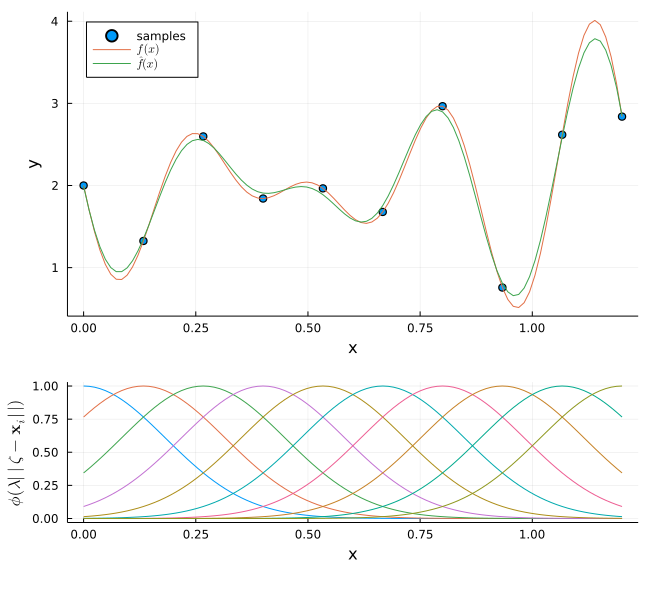

In [4]:
# test function plot
x_p = collect(reshape(LinRange(0,1.2,100),100,1))
p1 = plot(Xs, test_fun, st=:scatter, label="samples" )
plot!(x_p, test_fun, st=:line, label=L"f(x)",legend=:topleft)
xlabel!("x")
ylabel!("y")

# train the model
X = collect(Xs)
Y = test_fun.(X)
m = RBF(X=X , Y=Y, r=1e-6, λ=15.0, name="myRBF")
train(m,Guassian)

# Predictions
y_p = predict(m,x_p,Guassian)
plot!(x_p,y_p, label=L"\hat{f}(x)")

B = kernel(m.λ,x_p,m.X,Guassian)'
p2 = plot()                                       # empty Plot object
for i = 1:size(B,1)
    plot!(x_p,B[i,:],label=missing)
    xlabel!("x")
    ylabel!(L"\phi (\lambda \left||{\mathbf{\zeta} -\mathbf{x} _{i}}\right||)")
end
plot(p1, p2, size = (650, 600), layout = grid(2, 1, widths=[1.0 ,1.0], heights=[0.65 ,0.3]))